# Dataset Invasão Importação e Definição de linha Index

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data = pd.read_csv(r'dataset/10%',encoding ='utf8',sep=',')
data.columns = ['duration','protocol_type','service','flag','src_bytes',
                   'dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
                   'logged_in','num_compromised','root_shell','su_attempted','num_root',
                   'num_file_creations','num_shells','num_access_files',
                   'num_outbound_cmds','is_hot_login','is_guest_login','cont',
                   'srv_count','serror_rate','srv_serror_rate','rerror_rate',
                   'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
                   'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                   'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                   'dst_host_srv_diff_host_rate','dst_host_serror_rate',
                   'dst_host_srv_serror_rate','dst_host_rerror_rate',
                   'dst_host_srv_rerror_rate','classe'] 

# Filtragem por categorias de ataque

In [10]:
#######Filtra dados do dataset em dados de Ataque e conexões normais
Ataque = data[(data["classe"] == "back.") 
            |(data["classe"] == "land.")
            |(data["classe"] == "neptune.")
            |(data["classe"] == "pod.")
            |(data["classe"] == "smurf.")
            |(data["classe"] == "teardrop.")

            |(data['classe'] == "ftp_write.")
            |(data['classe'] == "guess_passwd.")
            |(data['classe'] == "imap.")
            |(data['classe'] == "miltihop.")
            |(data['classe'] == "phf.")
            |(data['classe'] == "spy.")
            |(data['classe'] == "warezclient.")
            |(data['classe'] == "warezmaster.")

            |(data['classe'] == "buffer_overflow.")
            |(data['classe'] == "loadmodule.")
            |(data['classe'] == "perl.")
            |(data['classe'] == "rootkit.")

            |(data['classe'] == "ipsweep.")
            |(data['classe'] == "nmap.")
            |(data['classe'] == "portsweep.")
            |(data['classe'] == "satan.")]

Normal = data[data['classe'] == 'normal.']

#########Filtra Todos os tipos de ataque classificando na categoria de ataque apropriada
FiltroDOS = data[(data["classe"] == "back.") 
                    | (data["classe"] == "land.")
                   |(data["classe"] == "neptune.")
                   |(data["classe"] == "pod.")
                   |(data["classe"] == "smurf.")
                   |(data["classe"] == "teardrop.")]

FiltroR2L = data[(data['classe'] == "ftp_write.")
                   |(data['classe'] == "guess_passwd.")
                   |(data['classe'] == "imap.")
                   |(data['classe'] == "miltihop.")
                   |(data['classe'] == "phf.")
                   |(data['classe'] == "spy.")
                   |(data['classe'] == "warezclient.")
                   |(data['classe'] == "warezmaster.")]

FiltroU2R = data[(data['classe'] == "buffer_overflow.")
                   |(data['classe'] == "loadmodule.")
                   |(data['classe'] == "perl.")
                   |(data['classe'] == "rootkit.")]

FiltroProbe = data[(data['classe'] == "ipsweep.")
                     |(data['classe'] == "nmap.")
                     |(data['classe'] == "portsweep.")
                     |(data['classe'] == "satan.")]

# Análise Exploratória

Distribuição de src_bytes (contínua)


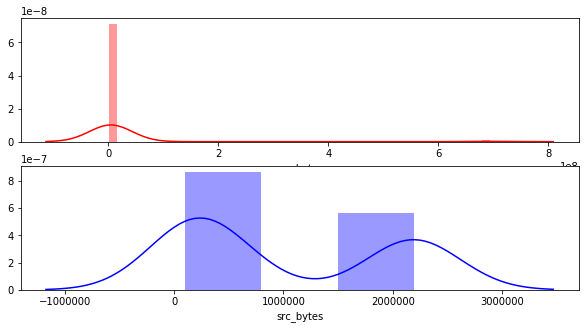

Distribuição de 'dst_bytes' (contínua)


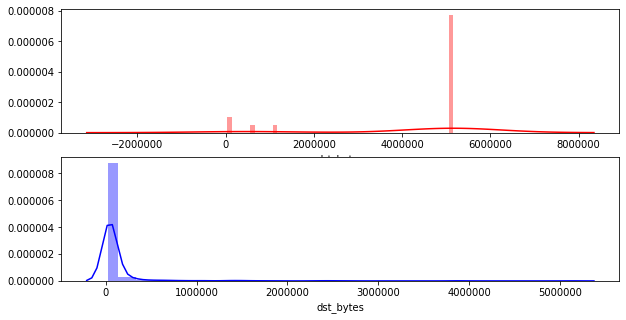

Distribuição de % de erro SYN (Contínua)


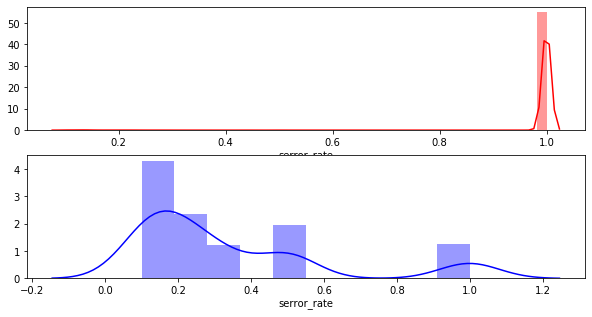

Distribuição de % conexões com diferente serviço (Contínua)


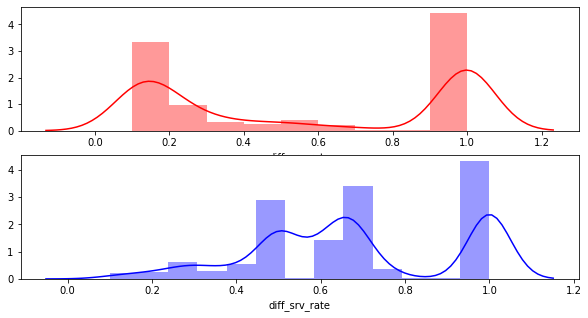

count


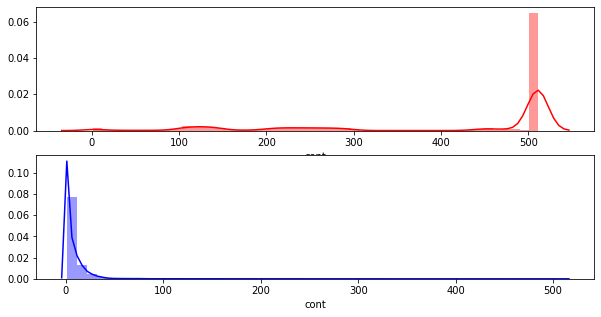

srv_count


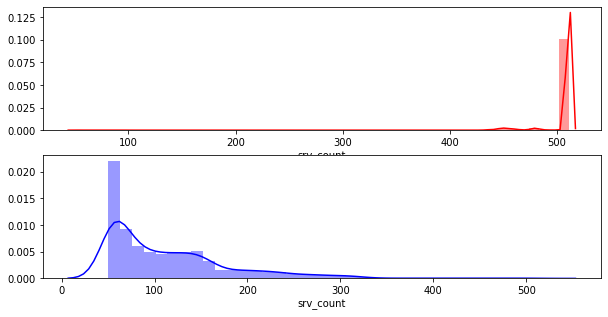

serror_rate


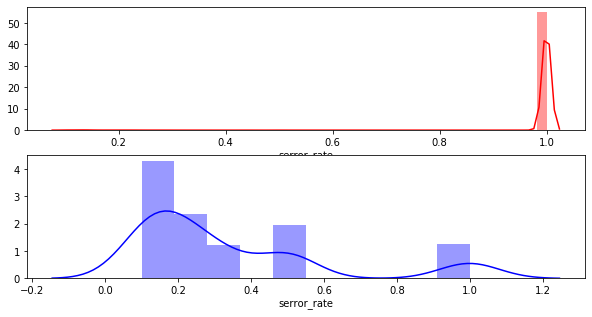

srv_serror_rate


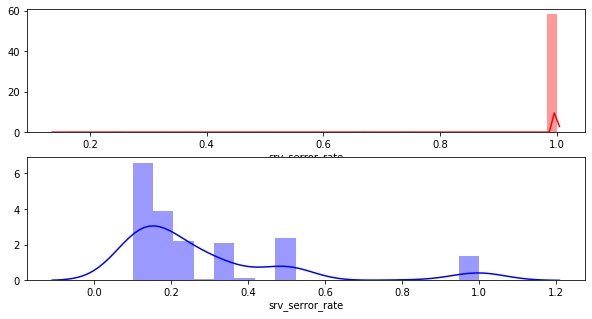

diff_srv_rate


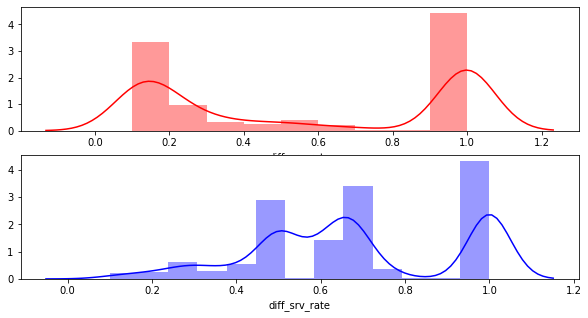

srv_diff_host_rate


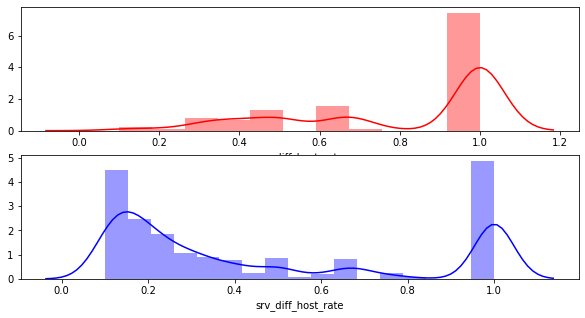

dst_host_count


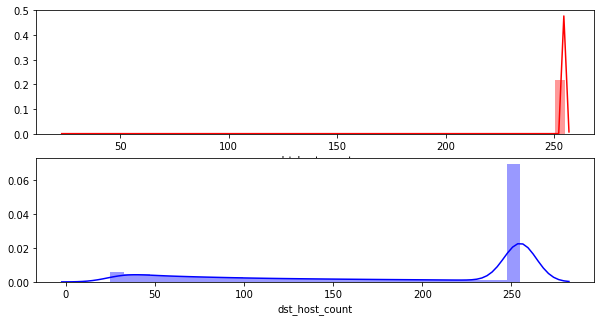

dst_host_diff_srv_rate


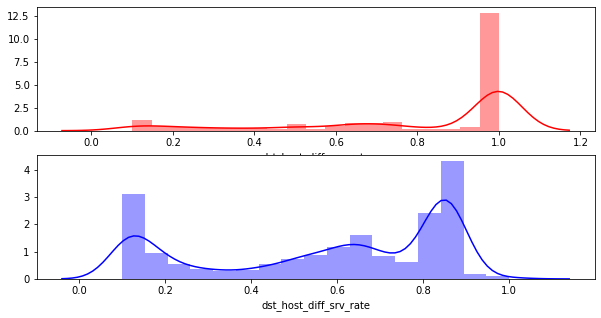

dst_host_same_src_port_rate


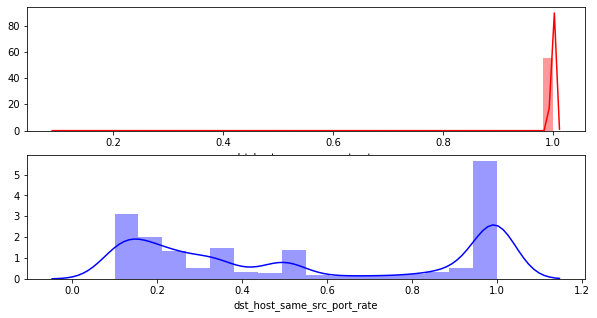

dst_host_srv_diff_host_rate


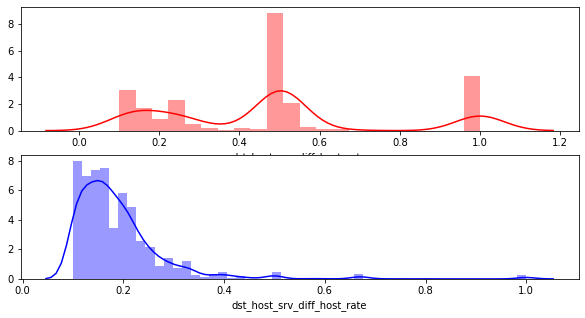

dst_host_serror_rate


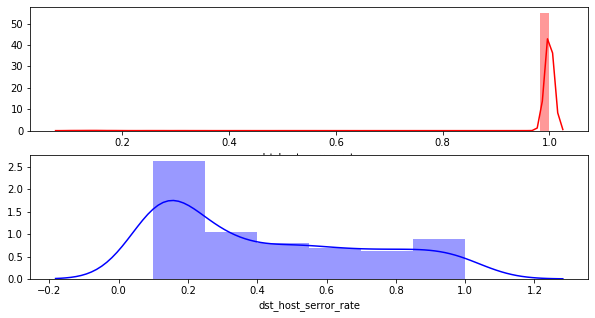

dst_host_srv_serror_rate


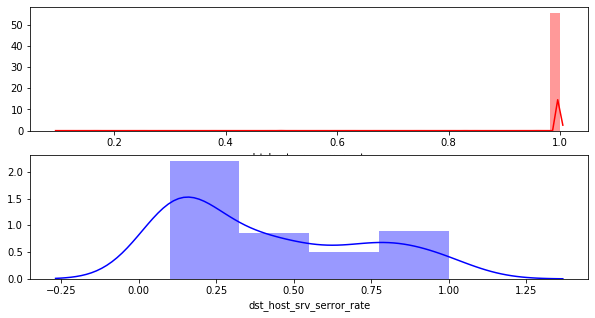

Distribuição de Fragmentos Quebrados


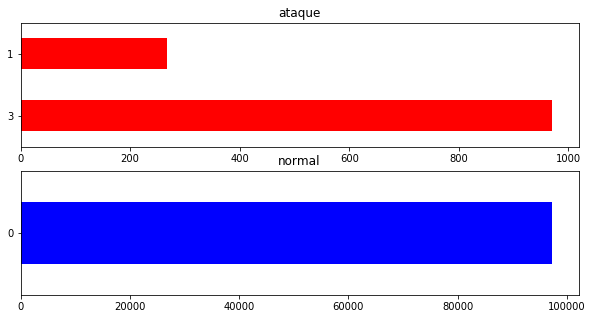

Distribuição de numero de falhas de login (discreta 1 ~ 5)


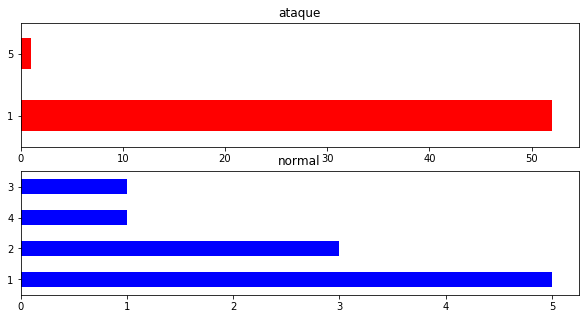

Distribuição de numero de arquivos acessados (Discreta)


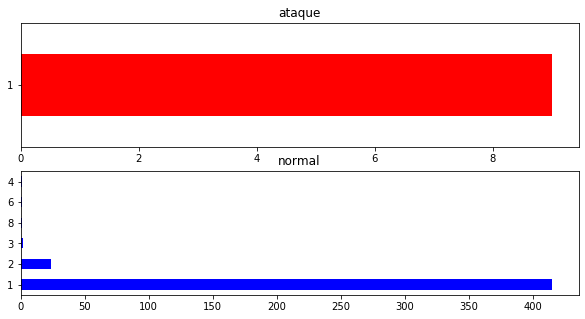

In [11]:
#Graficos de Interesse


print("Distribuição de src_bytes (contínua)")
A = Ataque[(Ataque['src_bytes'] >= 100000)]
N = Normal[(Normal['src_bytes'] >= 100000)]

fig,ax=plt.subplots(2, figsize=(10,5),sharex = False)
sns.distplot(A.src_bytes, kde=True, color="red", ax=ax[0])
sns.distplot(N.src_bytes, kde=True, color="blue", ax=ax[1])
plt.show()
##############################
print("Distribuição de 'dst_bytes' (contínua)")
A = Ataque[(Ataque['dst_bytes'] >= 30000)]
N = Normal[(Normal['dst_bytes'] >= 30000)]

fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.dst_bytes, kde=True, color="red", ax=ax[0])
sns.distplot(N.dst_bytes, kde=True, color="blue", ax=ax[1])
plt.show()
##############################
print("Distribuição de % de erro SYN (Contínua)")
A = Ataque[(Ataque['serror_rate'] >= 0.1)]
N = Normal[(Normal['serror_rate'] >= 0.1)]

fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.serror_rate, kde=True, color="red", ax=ax[0])
sns.distplot(N.serror_rate, kde=True, color="blue", ax=ax[1])
plt.show()
##############################
print("Distribuição de % conexões com diferente serviço (Contínua)")
A = Ataque[(Ataque['diff_srv_rate'] >= 0.1)]
N = Normal[(Normal['diff_srv_rate'] >= 0.1)]

fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.diff_srv_rate, kde=True, color="red", ax=ax[0])
sns.distplot(N.diff_srv_rate, kde=True, color="blue", ax=ax[1])
plt.show()
##################################

print("count")
A = Ataque[(Ataque.cont >= 0.1)]
N = Normal[(Normal.cont >= 0.1)]

fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.cont, kde=True, color="red", ax=ax[0])
sns.distplot(N.cont, kde=True, color="blue", ax=ax[1])
plt.show()
#############################################
A = Ataque[(Ataque['srv_count'] >= 50)]
N = Normal[(Normal['srv_count'] >= 50)]

print("srv_count")
fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.srv_count, kde=True, color="red", ax=ax[0])
sns.distplot(N.srv_count, kde=True, color="blue", ax=ax[1])
plt.show()
#############################################
A = Ataque[(Ataque['serror_rate'] >= 0.1)]
N = Normal[(Normal['serror_rate'] >= 0.1)]


print("serror_rate")
fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.serror_rate, kde=True, color="red", ax=ax[0])
sns.distplot(N.serror_rate, kde=True, color="blue", ax=ax[1])
plt.show()
#############################################
A = Ataque[(Ataque['srv_serror_rate'] >= 0.1)]
N = Normal[(Normal['srv_serror_rate'] >= 0.1)]


print("srv_serror_rate")
fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.srv_serror_rate, kde=True, color="red", ax=ax[0])
sns.distplot(N.srv_serror_rate, kde=True, color="blue", ax=ax[1])
plt.show()
#############################################
A = Ataque[(Ataque['diff_srv_rate'] >= 0.1)]
N = Normal[(Normal['diff_srv_rate'] >= 0.1)]


print("diff_srv_rate")
fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.diff_srv_rate, kde=True, color="red", ax=ax[0])
sns.distplot(N.diff_srv_rate, kde=True, color="blue", ax=ax[1])
plt.show()
#############################################
A = Ataque[(Ataque['srv_diff_host_rate'] >= 0.1)]
N = Normal[(Normal['srv_diff_host_rate'] >= 0.1)]


print("srv_diff_host_rate")
fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.srv_diff_host_rate, kde=True, color="red", ax=ax[0])
sns.distplot(N.srv_diff_host_rate, kde=True, color="blue", ax=ax[1])
plt.show()
#############################################
A = Ataque[(Ataque['dst_host_count'] >= 25)]
N = Normal[(Normal['dst_host_count'] >= 25)]


print("dst_host_count")
fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.dst_host_count, kde=True, color="red", ax=ax[0])
sns.distplot(N.dst_host_count, kde=True, color="blue", ax=ax[1])
plt.show()
#############################################
A = Ataque[(Ataque['dst_host_diff_srv_rate'] >= 0.1)]
N = Normal[(Normal['dst_host_diff_srv_rate'] >= 0.1)]


print("dst_host_diff_srv_rate")
fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.dst_host_diff_srv_rate, kde=True, color="red", ax=ax[0])
sns.distplot(N.dst_host_diff_srv_rate, kde=True, color="blue", ax=ax[1])
plt.show()
#############################################
A = Ataque[(Ataque['dst_host_same_src_port_rate'] >= 0.1)]
N = Normal[(Normal['dst_host_same_src_port_rate'] >= 0.1)]


print("dst_host_same_src_port_rate")
fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.dst_host_same_src_port_rate, kde=True, color="red", ax=ax[0])
sns.distplot(N.dst_host_same_src_port_rate, kde=True, color="blue", ax=ax[1])
plt.show()
#############################################
A = Ataque[(Ataque['dst_host_srv_diff_host_rate'] >= 0.1)]
N = Normal[(Normal['dst_host_srv_diff_host_rate'] >= 0.1)]


print("dst_host_srv_diff_host_rate")
fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.dst_host_srv_diff_host_rate, kde=True, color="red", ax=ax[0])
sns.distplot(N.dst_host_srv_diff_host_rate, kde=True, color="blue", ax=ax[1])
plt.show()
#############################################
A = Ataque[(Ataque['dst_host_serror_rate'] >= 0.1)]
N = Normal[(Normal['dst_host_serror_rate'] >= 0.1)]


print("dst_host_serror_rate")
fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.dst_host_serror_rate, kde=True, color="red", ax=ax[0])
sns.distplot(N.dst_host_serror_rate, kde=True, color="blue", ax=ax[1])
plt.show()
#############################################
A = Ataque[(Ataque['dst_host_srv_serror_rate'] >= 0.1)]
N = Normal[(Normal['dst_host_srv_serror_rate'] >= 0.1)]


print("dst_host_srv_serror_rate")
fig,ax=plt.subplots(2, figsize=(10,5))
sns.distplot(A.dst_host_srv_serror_rate, kde=True, color="red", ax=ax[0])
sns.distplot(N.dst_host_srv_serror_rate, kde=True, color="blue", ax=ax[1])
plt.show()
############################################
print("Distribuição de Fragmentos Quebrados")
A = Ataque[(Ataque['wrong_fragment'] >= 1)]
N = Normal[(Normal['wrong_fragment'] >= 0)]

fig,ax=plt.subplots(2, figsize=(10,5))
# sns.barplot(data=A.wrong_fragment,x=wrong_fragments,y=A.wrong_fragment.value_counts(),label="Ataque", color="red",ax=ax[0])
# sns.barplot(data=N.wrong_fragment,x=N.wrong_fragment.value_counts(),y=N.wrong_fragment.value_counts(),label="Normal", color="blue",ax=ax[1])
A.wrong_fragment.value_counts().plot.barh(title='ataque',color='red',ax=ax[0])
N.wrong_fragment.value_counts().plot.barh(title='normal',color='blue',ax=ax[1])
plt.show()
##############################
print("Distribuição de numero de falhas de login (discreta 1 ~ 5)")
A = Ataque[(Ataque['num_failed_logins'] >= 1)]
N = Normal[(Normal['num_failed_logins'] >= 1)]

fig,ax=plt.subplots(2, figsize=(10,5))
A.num_failed_logins.value_counts().plot.barh(title='ataque',color='red',ax=ax[0])
N.num_failed_logins.value_counts().plot.barh(title='normal',color='blue',ax=ax[1])
plt.show()
##############################
print("Distribuição de numero de arquivos acessados (Discreta)")
A = Ataque[(Ataque['num_access_files'] >= 1)]
N = Normal[(Normal['num_access_files'] >= 1)]

fig,ax=plt.subplots(2, figsize=(10,5))
A.num_access_files.value_counts().plot.barh(title='ataque',color='red',ax=ax[0])
N.num_access_files.value_counts().plot.barh(title='normal',color='blue',ax=ax[1])
plt.show()

# fig,ax=plt.subplots(2, figsize=(10,5))
# ax[0].pie(A.num_access_files.value_counts())
# ax[1].pie(N.num_access_files.value_counts())
# labels=['0','1','3']
# ax[0].legend(labels)
# ax[1].legend(labels)wrong_fragment
# ax[0].set_title('Ataque')
# ax[1].set_title('normal')
# plt.show()


# Análise Estatística

In [12]:
print("Features Anomalas:")
print(Ataque.describe())

Features Anomalas:
            duration     src_bytes     dst_bytes           land  \
count  396736.000000  3.967360e+05  3.967360e+05  396736.000000   
mean        6.617761  3.483820e+03  2.478476e+02       0.000053   
std       402.565939  1.102614e+06  3.175120e+04       0.007275   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  1.032000e+03  0.000000e+00       0.000000   
75%         0.000000  1.032000e+03  0.000000e+00       0.000000   
max     42448.000000  6.933756e+08  5.155468e+06       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   396736.000000  396736.000000  396736.000000      396736.000000   
mean         0.008010       0.000010       0.032016           0.000144   
std          0.150386       0.003889       0.761807           0.013931   
min          0.000000       0.000000       0.000000           0.000000   
25%    

In [13]:
print("Features Normais")
print(Normal.describe())

Features Normais
           duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  97277.000000  9.727700e+04  9.727700e+04  97277.000000         97277.0   
mean     216.659550  1.157058e+03  3.384630e+03      0.000010             0.0   
std     1359.220278  3.422630e+04  3.757839e+04      0.003206             0.0   
min        0.000000  0.000000e+00  0.000000e+00      0.000000             0.0   
25%        0.000000  1.470000e+02  1.360000e+02      0.000000             0.0   
50%        0.000000  2.310000e+02  4.210000e+02      0.000000             0.0   
75%        0.000000  3.130000e+02  2.121000e+03      0.000000             0.0   
max    58329.000000  2.194619e+06  5.134218e+06      1.000000             0.0   

             urgent           hot  num_failed_logins     logged_in  \
count  97277.000000  97277.000000       97277.000000  97277.000000   
mean       0.000031      0.044512           0.000185      0.718957   
std        0.009619      0.858468          

# Machine-Learning (Classification Algorithms)

In [14]:
#Preparação e divisão do dataset em train e teste
import pandas as pd
import numpy as np

features = ['duration','src_bytes',
                   'dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
                   'logged_in','num_compromised','root_shell','su_attempted','num_root',
                   'num_file_creations','num_shells','num_access_files',
                   'num_outbound_cmds','is_hot_login','is_guest_login','cont',
                   'srv_count','serror_rate','srv_serror_rate','rerror_rate',
                   'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
                   'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                   'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                   'dst_host_srv_diff_host_rate','dst_host_serror_rate',
                   'dst_host_srv_serror_rate','dst_host_rerror_rate',
                   'dst_host_srv_rerror_rate']

data = pd.read_csv(r'dataset/10%',encoding ='utf8',sep=',')
data.columns = ['duration','protocol_type','service','flag','src_bytes',
                   'dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
                   'logged_in','num_compromised','root_shell','su_attempted','num_root',
                   'num_file_creations','num_shells','num_access_files',
                   'num_outbound_cmds','is_hot_login','is_guest_login','cont',
                   'srv_count','serror_rate','srv_serror_rate','rerror_rate',
                   'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
                   'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                   'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                   'dst_host_srv_diff_host_rate','dst_host_serror_rate',
                   'dst_host_srv_serror_rate','dst_host_rerror_rate',
                   'dst_host_srv_rerror_rate','classe'] 

data.classe = np.where((data.classe == 'normal.'),0,1)#Converte os valores da coluna classe para inteiros para serem computados no algoritmo, (tudo na coluna classe que for igual a normal. receberá o valor 0 e tudo que não for receberá 1)

from sklearn.model_selection import train_test_split #biblioteca para particionar o dataset em train e teste para o algoritmo
X_train, X_test, y_train, y_test = train_test_split(data[features], data.classe, test_size=0.01, random_state=42) #divide o dataset em 4: Xtrain = features selecionadas(sem a feature classe) Ytrain(feature classe como respotas para se aprender com as demais features), Xtest que são as features que servirão para validar o aprendizado feito em train, e Ytest que servirá como indicador de quantas vezes o algoritmo acertou e errou

# print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
#       .format(
#           X_test.shape[0],
#           (y_test != y_pred).sum(),
#           100*(1-(y_test != y_pred).sum()/X_test.shape[0])
# ))#Fomata uma saida informado o formato do dataframe X_test, o numero de erros cometidos, e o desempenho da classificação feita.

In [15]:
#Modelo de classificação gaussiano
from sklearn.naive_bayes import GaussianNB#importa a biblioteca do algoritmo de classificação naiveBayes
nb = GaussianNB()#declara que o modelo de algoritmo utilizado é o naivebayes gaussiano

nb.fit(X_train,y_train)#roda o algoritmo gaussiano, relacionando o conteudo das colunas informadas(primeiro parâmetro) com a coluna em que está o resultado da classificação (segundo parâmetro)

y_pred = nb.predict(X_test) #roda o algoritmo somente com as colunas, sem a coluna resposta, para ver como é o desempenho do treino realizado com a parte train do dataset

print("Precisão do modelo de Classificação Gaussiano:",100*(1-(y_test != y_pred).sum()/X_test.shape[0]),"%")

Precisão do modelo de Classificação Gaussiano: 94.57599676178911 %


In [16]:
#Modelo Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)
print("Precisão do modelo de Classificação Logistic Regreesion:",100*(1-(y_test != y_pred).sum()/X_test.shape[0]),"%")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Precisão do modelo de Classificação Logistic Regreesion: 94.57599676178911 %


In [9]:
#Modelo Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sg.fit(X_train,y_train)
ypred = sg.predict(X_test)
print("Precisão do modelo de Classificação Logistic Regreesion:",100*(1-(y_test != y_pred).sum()/X_test.shape[0]),"%")

Precisão do modelo de Classificação Logistic Regreesion: 94.57599676178911 %


In [17]:
#Modelo Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15)
dt.fit(X_train,y_train)
ypred = dt.predict(X_test)
print("Precisão do modelo de Classificação Logistic Regreesion:",100*(1-(y_test != y_pred).sum()/X_test.shape[0]),"%")

Precisão do modelo de Classificação Logistic Regreesion: 94.57599676178911 %


In [ ]:
#Modelo K-Nearest Neighbours !
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,y_train)
ypred = model.predict(X_test)
print("Precisão do modelo de Classificação Logistic Regreesion:",100*(1-(y_test != y_pred).sum()/X_test.shape[0]),"%")

In [110]:
#Modelo Random Forest !
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)
model.fit(X_train,y_train)
ypred = model.predict(X_test)
print("Precisão do modelo de Classificação Logistic Regreesion:",100*(1-(y_test != y_pred).sum()/X_test.shape[0]),"%")

KeyboardInterrupt: 

In [ ]:
#Modelo Support Vector Machine !
from sklearn.svm import SVC
model = SVC(kernel='linear',C=0.025,random_state=101)
model.fit(X_train,y_train)
ypred = model.predict(X_test)
print("Precisão do modelo de Classificação Logistic Regreesion:",100*(1-(y_test != y_pred).sum()/X_test.shape[0]),"%")